Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set- Cover 
The Set Cover Problem is a classic combinatorial optimization problem.
Given a set of elements called the universe (U) and a collection of subsets (S) whose elements are subsets of (U), the objective is to find the smallest subset of (S) whose union covers the entire universe (U).

For instance, if we have the universe (U = {1, 2, 3, 4, 5}) and the collection of subsets (S = {{1, 2, 3}, {2, 4}, {3, 4}, {4, 5}}), in this case, we can cover all the elements of the universe with just two subsets: ({{1, 2, 3}, {4, 5}}).

# LAB 1 - Set Cover problem
 
We have to try to solve as efficiently as possible these instances customizing a technique discussed in class

INSTANCE 1 (UNIVERSE_SIZE = 100, NUM_SETS = 10, DENSITY = .2)

INStANCE 2 (UNIVERSE_SIZE = 1 000, NUM_SETS = 100, DENSITY = .2)

INSTANCE 3 (UNIVERSE_SIZE = 10 000, NUM_SETS = 1 000, DENSITY = .2)

INSTANCE 4 (UNIVERSE_SIZE = 100 000, NUM_SETS = 10 000, DENSITY = .1)

INSTANCE 5 (UNIVERSE_SIZE = 100 000, NUM_SETS = 10 000, DENSITY = .2)

INSTANCE 6 (UNIVERSE_SIZE = 100 000, NUM_SETS = 10 000, DENSITY = .3)


In [114]:
from random import random, seed
from itertools import product, accumulate
from matplotlib import pyplot as plt
import numpy as np #NumPy is what is missing from the standard library of Python. in this case arrays and matrices 
from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [115]:
UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2

#useful to generate random sequences 
rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

These lines are the one that we can use to create the problem. 

In [116]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

our elements are SETS and COSTS: 

In [117]:
SETS

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ...,  True, False, False]])

In [118]:
COSTS

array([4119.59990474, 4157.12442173, 4326.36289148, 4430.08502534,
       4175.89825122, 4236.96606492, 4387.62625851, 4220.51680908,
       4305.17464654, 4222.8663465 , 4244.01752492, 4227.56577783,
       4175.89825122, 4385.26852964, 4345.20481122, 4234.61581523,
       4321.65357566, 4293.40749137, 4434.80495701, 4394.70013598,
       4338.13821914, 4295.76068812, 4291.05441187, 4222.8663465 ,
       4124.28877619, 4246.36824838, 4281.64326737, 4124.28877619,
       4283.99587736, 4279.29077488, 4246.36824838, 4288.70144966,
       4288.70144966, 4206.42208336, 4213.46891044, 4415.92797463,
       4255.77232477, 4152.43216707, 4232.26568412, 4345.20481122,
       4239.31643314, 4215.81809099, 4380.55341767, 4112.5675073 ,
       4515.11335085, 4434.80495701, 4258.12363924, 4411.20987381,
       4201.72479469, 4321.65357566, 4347.56057419, 4335.78292089,
       4359.34112875, 4171.2040731 , 4371.12457815, 4394.70013598,
       4293.40749137, 4340.49363364, 4328.71772419, 4098.50599

## Helper Functions
This helper function that checks if a solution is valid and the cost of the solution. 
Different sets have different cost. we are not trying to minimize the number of sets,  but the cost of the sets. 

In [119]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [120]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
ic(valid(solution), cost(solution))
None

ic| valid(solution): np.True_
    cost(solution): np.float64(4279991.263122123)


In [121]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
ic(valid(solution), cost(solution))
None

ic| valid(solution): np.True_
    cost(solution): np.float64(2139890.759038822)


## Lab 1 - Solution 


We can try to solve the problem by applying the  SIMPLE RHMC. 

First of all, we need a tweak function.
A tweak function  makes small modifications to a current solution to generate a new candidate solution. The idea is to explore the solution space by making slight changes and evaluating if these changes lead to an improvement.

In [122]:
def tweak (solution: np.ndarray) -> np.ndarray:
        new_sol = solution.copy()
        i = rng.integers (0, NUM_SETS)
        new_sol[i] = not new_sol[i]
        return new_sol


Now we define the fitness.  
Fitness refers to a measure of how good a particular solution is relative to other solutions. It is a way to evaluate and compare different solutions to determine which one is better. 
We check if it is valid and then we return a tuple. 

In [123]:
def fitness (solution: np.ndarray): 
    return (valid(solution), -cost(solution))

Let's check the simplest possible solution:

ic| fitness(solution): 

(np.True_, np.float64(-4279991.263122123))
ic| fitness(solution): (np.True_, np.float64(-1631566.4655185824))


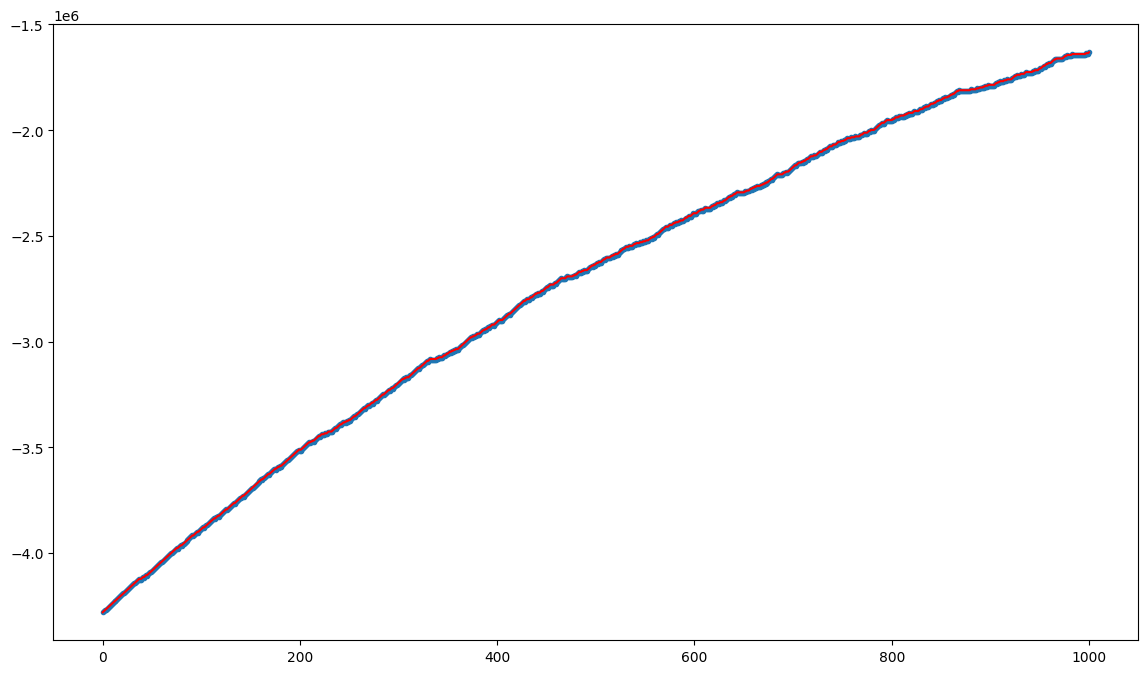

In [124]:
solution = rng.random(NUM_SETS)< 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))

for steps in range (1_000):
    new_solution = tweak (solution)
    f = fitness (new_solution)
    history.append(float(f[1]))

    if f > solution_fitness:
        solution  = new_solution
        solution_fitness = fitness(solution)

ic(fitness(solution))
plt.figure(figsize= (14, 8))
plt.plot (
    range(len(history)),
    list(accumulate(history, max)),
    color ="red",
)

_ = plt.scatter(range(len(history)), history, marker = ".")


we can improve the Simple RHMC by considering larger sets.

In [125]:
def single_mutation (solution: np.ndarray) -> np.ndarray:
        new_sol = solution.copy()
        i = rng.integers (0, NUM_SETS)
        new_sol[i] = not new_sol[i]
        return new_sol

def multiple_mutation (solution: np.ndarray) -> np.ndarray:
        mask = rng.random (NUM_SETS) < 0.01
        new_sol = np.logical_xor(solution, mask) 
        return new_sol

In [126]:
def fitness (solution: np.ndarray): 
    return (valid(solution), -cost(solution))

considering the simple mutation: 

ic| fitness(solution): (np.True_

, np.float64(-4279991.263122123))
ic| fitness(solution): (np.True_, np.float64(-1562381.349615595))


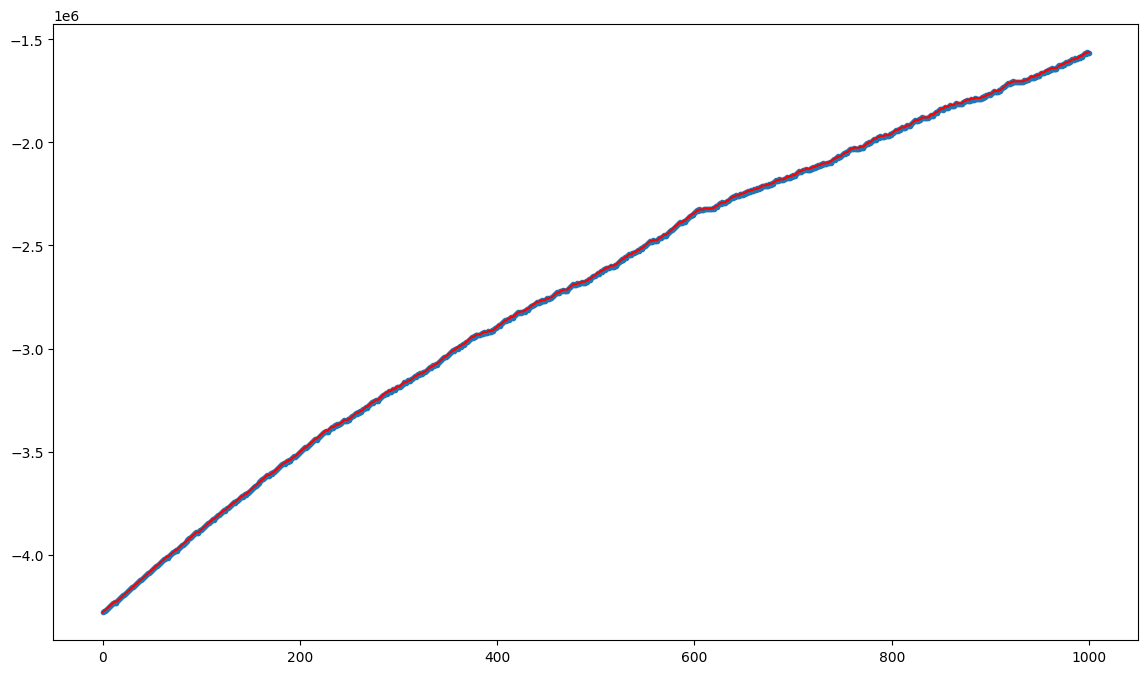

In [127]:
solution = rng.random(NUM_SETS)< 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))

tweak= single_mutation 

for steps in range (1_000):
    new_solution = tweak (solution)
    f = fitness (new_solution)
    history.append(float(f[1]))

    if f > solution_fitness:
        solution  = new_solution
        solution_fitness = fitness(solution)
      
ic(fitness(solution))
plt.figure(figsize= (14, 8))
plt.plot (
    range(len(history)),
    list(accumulate(history, max)),
    color ="red",
)

_ = plt.scatter(range(len(history)), history, marker = ".")

again with the multiple mutation:

ic| fitness(solution): (np

.True_, np.float64(-4279991.263122123))
ic| fitness(solution): (np.True_, np.float64(-1169117.0188814923))


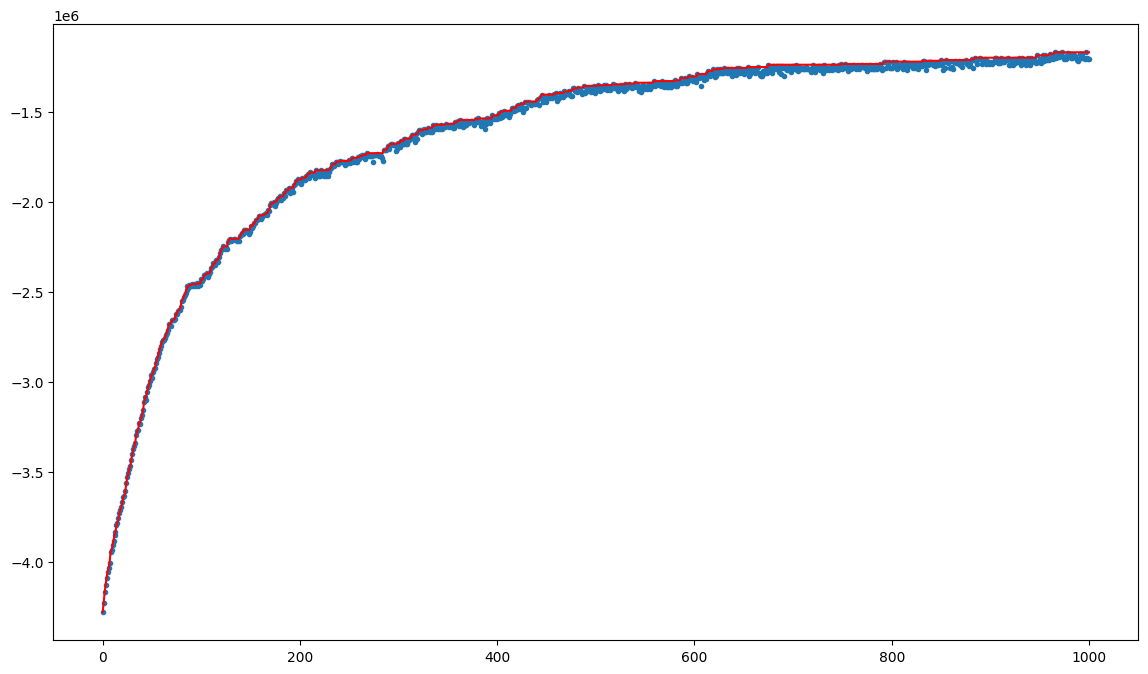

In [128]:
solution = rng.random(NUM_SETS)< 1
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(fitness(solution))

tweak= multiple_mutation 

for steps in range (1_000):
    new_solution = tweak (solution)
    f = fitness (new_solution)
    history.append(float(f[1]))

    if f > solution_fitness:
        solution  = new_solution
        solution_fitness = fitness(solution)
       
ic(fitness(solution))
plt.figure(figsize= (14, 8))
plt.plot (
    range(len(history)),
    list(accumulate(history, max)),
    color ="red",
)

_ = plt.scatter(range(len(history)), history, marker = ".")


---

**Red Line** Represents the maximum fitness value reached up to that point. The rising red line indicates that the algorithm is finding better solutions over the iterations.

**Blue Points** Represent the fitness values of the solutions generated in each iteration. The distribution of blue points below the red line shows the variations in fitness during the optimization process.

**Result**:
- **Positive**: If the red line continues to rise or remains constant at a high value, it means the algorithm is improving the solution or maintaining a good solution.
- **Negative**: If the red line drops or remains constant at a low value, it means the algorithm is not finding better solutions.

---

